<a href="https://colab.research.google.com/github/matheovictor/Explanation/blob/master/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sklearn
import sklearn.datasets
import sklearn.ensemble
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(42)

### Prevendo a renda individual usando informações de censo

In [2]:
data = pd.read_csv('adult.data', header=None)
X = data.drop([8,9,14], axis = 1)
X.columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", 
                 "Marital Status","Occupation", "Relationship", "Capital Gain", "Capital Loss","Hours per week", "Country"]
y = data[14]

### Fittando um modelo

In [3]:
## encodando as variaveis categoricas.
X = pd.get_dummies(X)
le = LabelEncoder()
labels = le.fit_transform(y)

In [4]:
np.random.seed(1) ## separando dados em treino e teste
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(X, labels, train_size=0.80)

In [5]:
##fittando o modelo
algo = LGBMClassifier(n_estimators = 100)
algo.fit(train, labels_train) 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [6]:
#avaliação em validação
roc_auc_score(labels_test, algo.predict_proba(test)[:,1]) 

0.9230516445619296

### Analise de interpretabilidade: Interpretando localmente

In [10]:
#iniciando o shap e caclulando os shap values para a base de teste.
import shap
shap.initjs()

explainer = shap.TreeExplainer(algo)## Cria um Explainer com um algoritmo
shap_values = explainer.shap_values(test) ## Calcula Shap values para as amostras do teste.

C extension was not built during install!


In [11]:

##Scorando individuos especificos da base
shap.force_plot(explainer.expected_value, shap_values[10,:], test.iloc[10,:])

In [12]:
shap.force_plot(explainer.expected_value, shap_values[1653,:], test.iloc[1653,:])

### Interpretando Globalmente

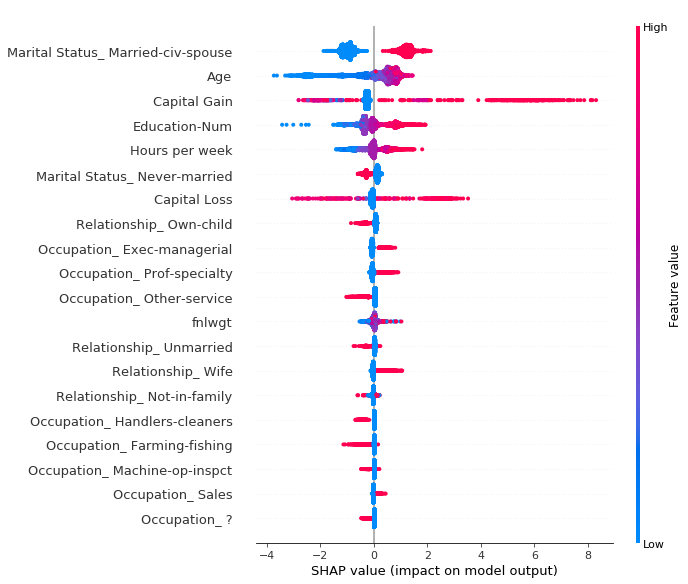

In [13]:
shap.summary_plot(shap_values, test)

Could not find feature named: none


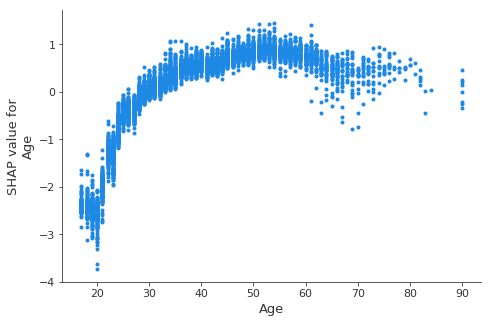

In [14]:
shap.dependence_plot("Age", shap_values, test, interaction_index="none")


Could not find feature named: none


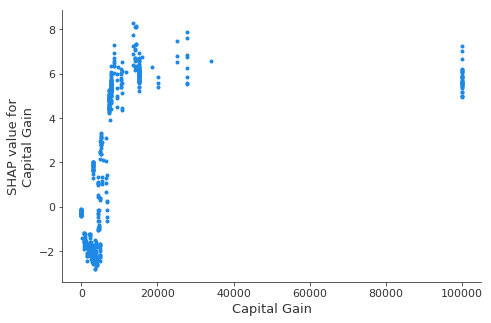

In [15]:
shap.dependence_plot("Capital Gain", shap_values, test, interaction_index="none")